# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Tuesday, Feb. 14, submitted via Canvas by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. You may work in teams of two if you wish. Only one student per team needs to submit the assignment on Canvas. But be sure to include name and UTID for both students.  Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1: Ridge and Lasso Regression (15 points)
Use the following codes to import the diabetes dataset.

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

After importing the datasets, use the following code to add additional interaction variables to the features matrix.  You should have 55 variables (including 45 interaction variables) and one target variable. Note that this code adds one term for every pair of variables; in practice one may introduce only a few select interaction terms based on domain knowledge or experimentation.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Question 1(1)


Using Lasso,the best alpha is:  0.00660970574233  the min mse is:  2958.09331656

Using Ridge,the best alpha is:  0.005  the min mse is:  2979.58066896

Question 1(2)



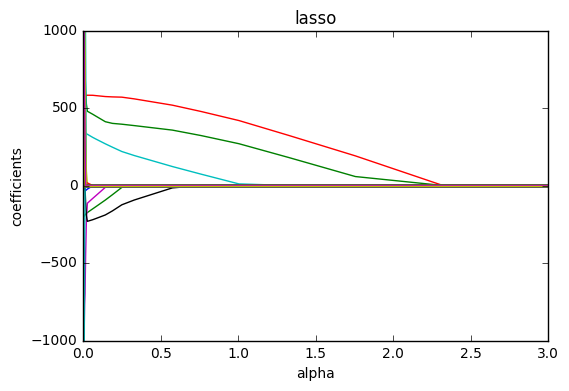

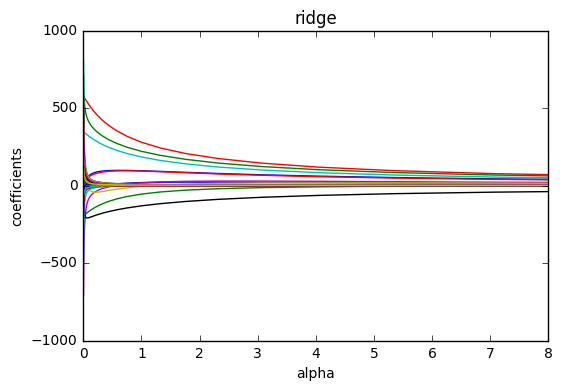


First, we can see that as alpha increases,the coefficients of both Lasso and Ridge tend to decrease.
Besides, when alpha changes, the change of coefficients are different in Lasso and Ridge. When alpha increases 
the coefficients of Lasso will more agressively decrease to zero compared to the coefficients of Ridge.

Question 1(3)



The MSE for linear regression is:  3377.94455926
The MSE for lasso is:  2972.25999624
The MSE for ridge is:  2959.81880664

Question 1(4)



The best alpha using lassoCV is:  0.00598825050149


The 55 coefficients are: 
[   -8.94518066  -197.42917697   565.59654567   346.75782597  -946.19416293
   732.36194039    66.31444283     0.           826.20613334     6.44244751
  2520.57765202     0.             0.             0.            -0.             0.
     0.          1532.33157546    -0.             0.           682.00431451
     0.             0.             0.         -1215.55878077     0.             0.
  1076.31750372     0.             0.            -

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33, random_state=20)
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
import numpy as np

##1
#function for calculate root mean squared error or mean squared error
#flag='MSE' return MSE,otherwise return RMSE
def rmse(estimated,target,option):
    if option=='MSE':
        return metrics.mean_squared_error(estimated,target)
    else:
        return np.sqrt((metrics.mean_squared_error(estimated,target)))
#function for k fold cross validation, return average RMSE or MSE
def KFoldCV(k,X,y,model,flag):
    kf=KFold(n_splits=k)
    RMSE=[]
    for train,test in kf.split(X):
        model.fit(X[train],y[train])
        estimated=model.predict(X[test])
        RMSE.append(rmse(estimated,y[test],flag))
    return np.mean(RMSE)

##(1)
print '\nQuestion 1(1)\n'
alphas =  10**np.linspace(-2,10,100)*0.5
#use dictionary to store alphas and corresponding minimum MSE
dic_lasso={}
dic_ridge={}
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    ridge=Ridge(alpha=alpha)
    MSE_lasso=KFoldCV(5,X_train,y_train,lasso,'MSE')
    MSE_ridge=KFoldCV(5,X_train,y_train,ridge,'MSE')
    dic_lasso[alpha]=MSE_lasso
    dic_ridge[alpha]=MSE_ridge
best_alpha_lasso=min(dic_lasso,key=dic_lasso.get)
best_alpha_ridge=min(dic_ridge,key=dic_ridge.get)
print '\nUsing Lasso,the best alpha is: ',best_alpha_lasso,' the min mse is: ',dic_lasso[best_alpha_lasso]
print '\nUsing Ridge,the best alpha is: ',best_alpha_ridge,' the min mse is: ',dic_ridge[best_alpha_ridge]


##(2)
print '\nQuestion 1(2)\n'
dic_lasso={}
dic_ridge={}
coefs_lasso=np.empty([X.shape[1],len(alphas)])
coefs_ridge=np.empty([X.shape[1],len(alphas)])
for i in range(len(alphas)):
    alpha=alphas[i]
    lasso=Lasso(alpha=alpha)
    ridge=Ridge(alpha=alpha)
    lasso.fit(X_train,y_train)
    ridge.fit(X_train,y_train)
    coefs_lasso[:,i]=lasso.coef_
    coefs_ridge[:,i]=ridge.coef_  
# plot 
import matplotlib.pyplot as plt
plt.figure()
for i in range(coefs_lasso.shape[0]):
    plt.plot(alphas,coefs_lasso[i,:])
plt.title('lasso')
plt.xlabel('alpha')
plt.xlim([0,3])
plt.ylim([-1000,1000])
plt.ylabel('coefficients')
plt.figure()
for i in range(coefs_lasso.shape[0]):
    plt.plot(alphas,coefs_ridge[i,:])
plt.title('ridge')
plt.xlabel('alpha')
plt.xlim([0,8])
plt.ylim([-1000,1000])
plt.ylabel('coefficients')
plt.show()
print '\nFirst, we can see that as alpha increases,the coefficients of both Lasso and Ridge tend to decrease.' 
print 'Besides, when alpha changes, the change of coefficients are different in Lasso and Ridge. When alpha increases '
print 'the coefficients of Lasso will more agressively decrease to zero compared to the coefficients of Ridge.'
##(3)
print '\nQuestion 1(3)\n'
from sklearn.linear_model import LinearRegression
lasso=Lasso(alpha=best_alpha_lasso)
ridge=Ridge(alpha=best_alpha_ridge)
linear=LinearRegression()
linear.fit(X_train,y_train)
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
estimated_linear=linear.predict(X_test)
MSE_linear=metrics.mean_squared_error(estimated_linear,y_test)
estimated_lasso=lasso.predict(X_test)
MSE_lasso=metrics.mean_squared_error(estimated_lasso,y_test)
estimated_ridge=ridge.predict(X_test)
MSE_ridge=metrics.mean_squared_error(estimated_ridge,y_test)
print '\n\nThe MSE for linear regression is: ',MSE_linear
print 'The MSE for lasso is: ',MSE_lasso
print 'The MSE for ridge is: ',MSE_ridge

##(4)
print '\nQuestion 1(4)\n'
from sklearn.linear_model import LassoCV
lasso_cv=LassoCV(alphas=None,cv=10,max_iter=10000)
lasso_cv.fit(X_train,y_train)
alphas=lasso_cv.alphas_
mse_path=lasso_cv.mse_path_
min_mse=float('inf')
min_ind=-1
for i in range(len(alphas)):
    if(np.mean(mse_path[i,:])<min_mse):
        min_ind=i
        min_mse=np.mean(mse_path[i,:])
best_alpha_lassocv=alphas[min_ind]
print '\n\nThe best alpha using lassoCV is: ',best_alpha_lassocv
lasso=Lasso(alpha=best_alpha_lassocv)
lasso.fit(X_train,y_train)
print '\n\nThe 55 coefficients are: \n',lasso.coef_

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (4pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (3pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 55 variables. What do you observe from these coefficients? (3pts)

# Question 2: Multi-layer Perceptron Regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the Boston house-prices dataset for this problem http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html.

Following code will load and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**.



Question 2(1)


/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The average RMSE with hidden_layer_sizes of  (2,)  is  5.67824741346
The average RMSE with hidden_layer_sizes of  (8,)  is  4.34370743228
The average RMSE with hidden_layer_sizes of  (15,)  is  3.84806882485


Question 2(2)
With hidden_layer_sizes as  (2,)  the training RMSE is:  5.02382771248 the testing RMSE is:  4.96115622735
With hidden_layer_sizes as  (8,)  the training RMSE is:  2.55815487937 the testing RMSE is:  4.27238345715
With hidden_layer_sizes as  (15,)  the training RMSE is:  1.96487751008 the testing RMSE is:  3.93351931643


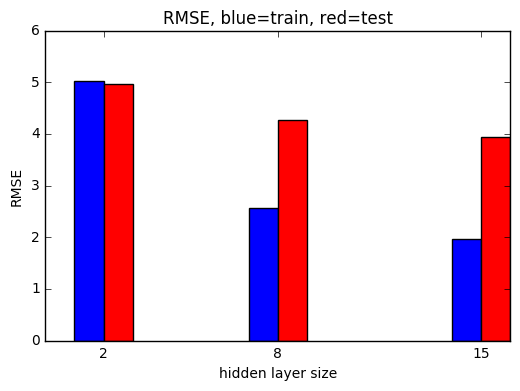

As the hidden layer sizes increases, the training RMSE and testing RMSE both tend to decrease.
We could also notice that when hidden layer size increases from 8 to 15,the reduce of training
RMSE and testing RMSE is smaller compared to when hidden layer size increase from 2 to 8.


Question 2(3)


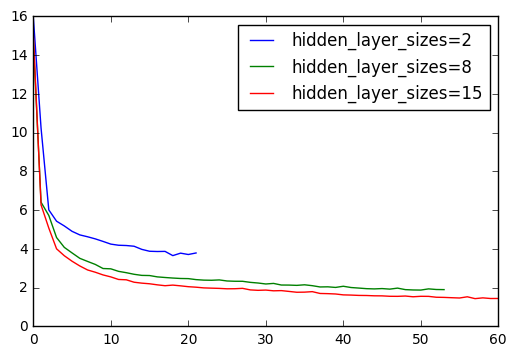



Question 2(4)
The RMSE for learning_init of 0.005 is 3.848
The RMSE for learning_init of 0.010 is 4.130
The RMSE for learning_init of 1.000 is 54269491236362292021900234194944.000


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
data = datasets.load_boston()
feature_cols = data.feature_names
X = pd.DataFrame(data.data, columns = feature_cols)
y = pd.Series(data.target)



##(1)
print '\n\nQuestion 2(1)'
#scale data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
y_train=y_train[:,None]
y_test=y_test[:,None]
#fit
##(1.a)
mlps=[]
hidden_layer_size=[(2,),(8,),(15,)]
for i in range(len(hidden_layer_size)):
    mlp=MLPRegressor(activation='tanh',solver='sgd',learning_rate='constant',
                hidden_layer_sizes=hidden_layer_size[i],random_state=42,batch_size=40,learning_rate_init=0.005)
    mlps.append(mlp)
RMSE=[]
for mlp in mlps:
    RMSE.append(KFoldCV(5,X_train,y_train,mlp,'RMSE'))
for i in range(len(hidden_layer_size)):
    print 'The average RMSE with hidden_layer_sizes of ',hidden_layer_size[i],' is ',RMSE[i]
    
##(2)
print '\n\nQuestion 2(2)'
estimated_train=[]
estimated_test=[]
RMSE_train=[]
RMSE_test=[]
for i in range(len(mlps)):
    mlp=mlps[i]
    mlp.fit(X_train,y_train)
    estimated_train=mlp.predict(X_train)
    estimated_test=mlp.predict(X_test)
    train=rmse(estimated_train,y_train,'RMSE')
    RMSE_train.append(train)
    test=rmse(estimated_test,y_test,'RMSE')
    RMSE_test.append(test)
    print 'With hidden_layer_sizes as ',hidden_layer_size[i],' the training RMSE is: ',train,'the testing RMSE is: ',test
    
#plot
plt.figure()
RMSE_train=np.array(RMSE_train)
RMSE_test=np.array(RMSE_test)
width=1
x=range(6)
plt.bar([1,7,14],RMSE_train,width,color='blue')
plt.bar([2,8,15],RMSE_test,width,color='red')
plt.title('RMSE, blue=train, red=test')
plt.xlabel('hidden layer size')
plt.ylabel('RMSE')
plt.xticks([2,8,15])
plt.show()
print 'As the hidden layer sizes increases, the training RMSE and testing RMSE both tend to decrease.'
print 'We could also notice that when hidden layer size increases from 8 to 15,the reduce of training'
print 'RMSE and testing RMSE is smaller compared to when hidden layer size increase from 2 to 8.' 

##(3)
print '\n\nQuestion 2(3)'
plt.figure()
lines=[]
for i in range(len(mlps)):
    mlp=mlps[i]
    label='hidden_layer_sizes='+str(hidden_layer_size[i][0])
    line,=plt.plot(np.sqrt(mlp.loss_curve_),label=label)
    lines.append(line)
plt.legend(handles=lines)
plt.show()

##(4)
print '\n\nQuestion 2(4)'
learning_inits=[0.005,0.01,1]
mlps=[]
for i in range(len(learning_inits)):
    mlp=MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
                     batch_size=40, hidden_layer_sizes = (15,),learning_rate_init=learning_inits[i])
    mlps.append(mlp)
RMSE=[]
for mlp in mlps:
    RMSE.append(KFoldCV(5,X_train,y_train,mlp,'RMSE'))
for i in range(len(learning_inits)):
    print 'The RMSE for learning_init of %.3f is %.3f'%(learning_inits[i],RMSE[i])


    


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. 

1) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.005
    
Now, consider three different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (8,)* (c) *hidden_layer_sizes = (15,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a), (b), and (c) (5pts)
      
2) Now, using the same number of hidden units used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works the best, (a), (b), or (c)? Briefly analyze the result in terms of the number of hidden units. (3pts)

3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves for model (a), (b), and (c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* value. (2pts)

4) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, hidden_layer_sizes = (15,)
    
Now, consider three different settings for the learning rates:
    
   (i) *learning_rate_init = 0.005* (ii) *learning_rate_init = 0.01* (iii) *learning_rate_init = 1*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (i), (ii), and (iii) (5pts)



# Question 3 - Stochastic Gradient Descent (10pts)

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1x_2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook, or include the image in your notebook. (3pts)
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1x_2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. There should be a _fit_ function that takes parameters X, y, learning rate, and number of iterations, and a _predict_ function that takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .0003, .001] . Plot MSE and the $w$ parameters as a function of epoch count. (7pts)

# Answer 
![title](Q3.jpg)



Question 3(2)

The MSE with learning rate of 0.0001 is 4.6984
The MSE with learning rate of 0.0003 is 21.2263
The MSE with learning rate of 0.0010 is 17406741745515982539160270638684654817715870837778179231384263642345659096037306731361493729236044491389934909156953492256603504640.0000


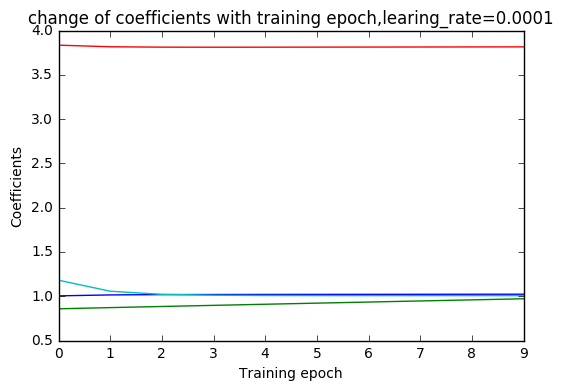

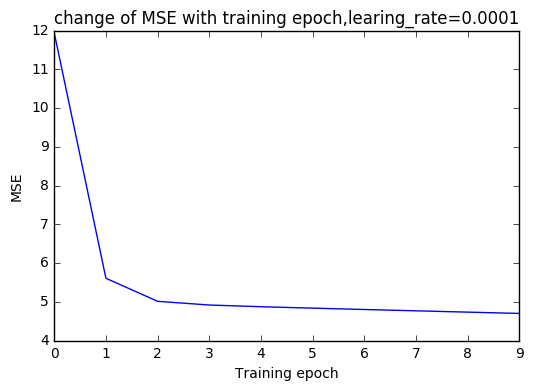

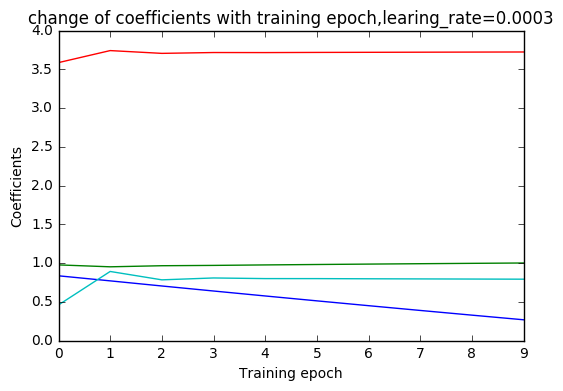

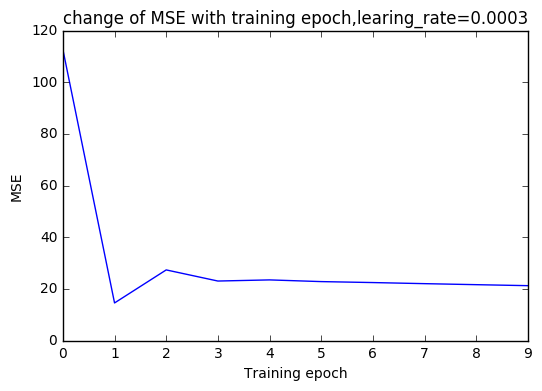

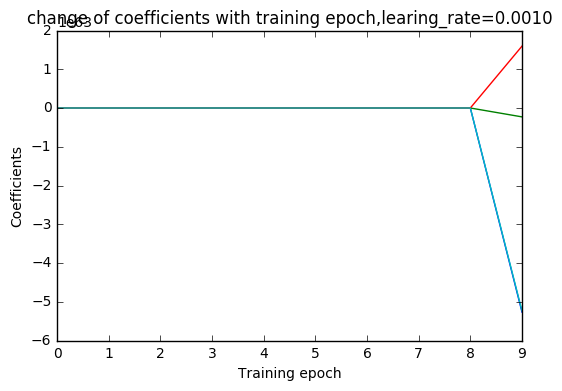

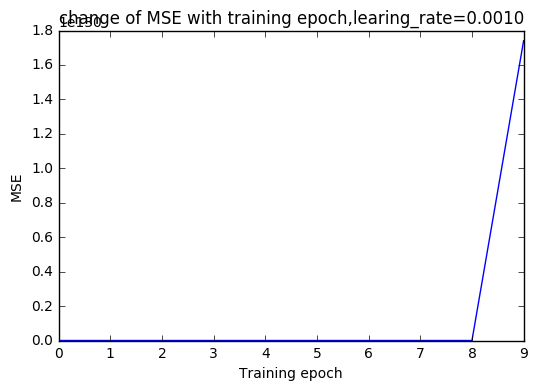

In [5]:
class SGD:
    coef_=np.empty([4,1])
    def fit(this,X,y,r,max_iter):
        n=X.shape[0]
        coefs=np.empty([4,max_iter])
        MSE=np.empty([1,max_iter])
        pre_coef=np.ones(4)
        coef=np.ones(4)
        for i in range(max_iter):
            for j in range(n):
                coef[0]=pre_coef[0]-r*2*(pre_coef[0]+pre_coef[1]*X[j,0]+pre_coef[2]*X[j,0]*X[j,1]+pre_coef[3]*X[j,1]-y[j])
                coef[1]=pre_coef[1]-r*2*(pre_coef[0]+pre_coef[1]*X[j,0]+pre_coef[2]*X[j,0]*X[j,1]+pre_coef[3]*X[j,1]-y[j])*X[j,0]
                coef[2]=pre_coef[2]-r*2*(pre_coef[0]+pre_coef[1]*X[j,0]+pre_coef[2]*X[j,0]*X[j,1]+pre_coef[3]*X[j,1]-y[j])*X[j,0]*X[j,1]
                coef[3]=pre_coef[3]-r*2*(pre_coef[0]+pre_coef[1]*X[j,0]+pre_coef[2]*X[j,0]*X[j,1]+pre_coef[3]*X[j,1]-y[j])*X[j,1]
                pre_coef=coef;
            coefs[:,i]=coef
            this.coef_=coef
            estimated=this.predict(X)
            MSE[0,i]=metrics.mean_squared_error(estimated,y)
        return coefs,MSE
    def predict(this,X):
        return this.coef_[0]+this.coef_[1]*X[:,0]+this.coef_[2]*X[:,1]*X[:,0]+this.coef_[3]*X[:,1]
    
#read samples.csv
print '\n\nQuestion 3(2)\n'
from sklearn import metrics
data=pd.read_csv("samples.csv")
n_rows=data.shape[0]
data=pd.DataFrame(data=data)
data=data.tail(n_rows-1).values
X=data[:,1:3]
y=data[:,3]
sgd=SGD()
learning_rates=[0.0001,0.0003,0.001]
for i in range(len(learning_rates)):
    coefs,MSEs=sgd.fit(X,y,learning_rates[i],10)
    plt.figure()
    for j in range(4):
        plt.plot(range(10),coefs[j,:])
    plt.title('change of coefficients with training epoch,learing_rate=%.4f'%learning_rates[i])
    plt.ylabel('Coefficients')
    plt.xlabel('Training epoch')
    plt.figure()
    plt.plot(range(10),MSEs[0,:])
    plt.title('change of MSE with training epoch,learing_rate=%.4f'%learning_rates[i])
    plt.ylabel('MSE')
    plt.xlabel('Training epoch')
    estimated=sgd.predict(X)
    MSE=metrics.mean_squared_error(estimated,y)
    print 'The MSE with learning rate of %.4f is %.4f'%(learning_rates[i],MSE)
plt.show()
    


# Question 4 - Linear Regression: Least Squares and MLE (5pts)
Consider linear regression with a single independent variable. Thus, predicted values are given by:  
$$y  = w_0  + w_1 x$$

Mathematically show that if the assumptions behind linear regression hold (slide 3 of the MLR slides), then the values of $w_0$ and $w_1$ obtained by minimizing MSE are indeed the  maximum likelihood solution of the corresponding underlying probability model relating the target variable to the input variable.
# Answer
![title](Q4.jpg)

# Question 5 - Collinearity in Multiple Linear Regression (5pts)
What do you understand by the collinearity problem that can be encountered in MLR? Suggest one way of alleviating this problem.

# Answer
Collinearity is the problem that two or more predictors are highly correlated in MLR. The existence of collinearity could inflate standard errors of coefficients, which means uncertain about coefficients will increase. MLR model with collinearity problem can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor. 

One possible way is: use dummy coding for categorical variables.


# Question 6 - Variable Selection Property of LASSO (5pts)

Explain in your own words (max 2 paras) what the diamond, circular and elliptical shapes in Fig 6.7 of JW (page 222) mean, and how this figure tries to explain why lasso tends to drive the values of some parameters to zero more aggressively as compared to ridge regression.

# Answer
The diamond shape reprents the penelty value of Lasso. It means when the (w0,w1) is in this shape,the penelty item in the cost function has the same value. 
The circular shape reprents the penelty value of Ridge. The penelty value remains constant when (w0,w1) is in the circular shape.
The diamond and circular shapes could also be viewed as constraint regions for Lasso and Ridge. 
The ellipses are the contours of mean squared error, which means all points on a given ellipse share a common mean squared error.
The best coefficients are given by the point where the ellipse intersects with the circular or diamond. We can see from fig 6.7, for Ridge, it couldn't be possible that the intersection point will be on an axis since the constraint region of Ridge is circular. For Lasso, the constraint region is diamon and has corner on axis, so there is a higher chance that the ellipse will contact the diamond on axis, which means certain coefficients are zero. 